# HR Attrition Prediction



## Data

In this dataset, we have employees as data points and different features for them. We have 'Attrition' as the target column.

Let us start by importing some basic packages.

## Accessing data and preprocessing

In [ ]:
#Ignore deprecated warnings
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

Let us load the HR attrition dataset now.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_Employee_Attrition_Dataset.xlsx to HR_Employee_Attrition_Dataset.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['HR_Employee_Attrition_Dataset.xlsx']))

In [ ]:
# displaying the first 3 rows
df.head(3)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [ ]:
# set the EmployeeNumber as the index
df = df.set_index('EmployeeNumber')
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Having looked at the data, we realise that there are some cateogorical variables that are nominal. We should encode these variables.
# The modelling algorithms require data in numerical form and thus we need to convert categories to numbers by encoding.

to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]
df = pd.get_dummies(data = df, columns= to_get_dummies_for, drop_first= True)       

In [ ]:
df.shape

(2940, 57)

We have encoded the dimensions and now the no of features are 57.
Let us now treat the other variables.

In [ ]:
df.head(3)

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Yes,41,1102,1,94,4,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,No,49,279,8,61,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Yes,37,1373,2,92,3,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
dict_over18 = {'Y': 1, 'N':0}
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Over18'] = df.Over18.map(dict_over18)
df['Attrition'] = df.Attrition.map(dict_attrition)

Y_HR = df.Attrition
X_HR = df.drop(columns = ['Attrition'])

In [ ]:
df.head(3)

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,41,1102,1,94,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,49,279,8,61,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,37,1373,2,92,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,2940.0,0.161224,0.367800,0.0,0.0,0.0,0.0,1.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
Over18,2940.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Now that we have treated the categorical columns, let us now look at the shape of the data.

In [ ]:
df.shape

(2940, 57)

## Decision Tree

- In this section we will implement a decision tree classifier on our data.
- Aim is to get good recall for class 1 as the company would want the model to correctly identify as many of the 'at risk' employees as possible.



In [ ]:
#train-validation-test split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features = [i for i in df.columns if i not in ('Attrition')]
X, y  = df[features], df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state = 12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, random_state = 12)


In [ ]:
# Fitting the tree and evaluation using the validation set

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_train, y_train)

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_val, dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1387
           1       1.00      1.00      1.00       266

    accuracy                           1.00      1653
   macro avg       1.00      1.00      1.00      1653
weighted avg       1.00      1.00      1.00      1653

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       463
           1       0.75      0.70      0.72        89

    accuracy                           0.91       552
   macro avg       0.84      0.83      0.83       552
weighted avg       0.91      0.91      0.91       552



**Observations**

 - The overall accuracies are 1.00 and 0.91 for the train and the validation set respectively. 
 - The more important metric here would be recall, specifically for class 1.
 - Note that, since we are targeting recall for class 1, we can't use the GridSearchCV or RandomSearchCV directly to find the best set of hyperparameters.
 - Let us try to tune the tree using a few hyperparameters.
 - Let's start with max_depth

In [ ]:
# We will use the recall_Score with the pos_label 1 to understand the required metric in the train and the validation set

from sklearn.metrics import recall_score
dict_recall = {}

for max_depth in range(3,21):
  lista = []
  dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=max_depth, random_state=42)
  dtree.fit(X_train, y_train)
  lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
  lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
  dict_recall[max_depth] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.172932,0.203008,0.372180,0.548872,0.672932,0.684211,0.830827,0.898496,0.943609,0.954887,0.996241,1.000000,0.996241,1.000000,1.000000,1.000000,1.000000,1.000000
Val,0.123596,0.146067,0.235955,0.337079,0.505618,0.415730,0.505618,0.573034,0.617978,0.651685,0.685393,0.696629,0.685393,0.696629,0.696629,0.696629,0.696629,0.696629


The tree is giving a recall of 1 for label 1 from 14th depth onwards. Depth is not doing much to reduce the overfitting.
 -  Lets try out min_samples_leaf now. To read more on the hyperparameters, visit <a href = "https://colab.research.google.com/drive/14p0EQXI4kWNb5u7jn7_dfE-ciHE9gbDH#scrollTo=W-TX_tau6fhT&line=2&uniqifier=1">here</a>.

In [ ]:
from sklearn.metrics import recall_score
dict_recall_1 = {}

for m in range(2,20, 2):
  lista = []
  dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=m, random_state=42)
  dtree.fit(X_train, y_train)
  lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
  lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
  dict_recall_1[m] = lista

df = pd.DataFrame(dict_recall_1)
df.index = ['Train', 'Val']
df

,2,4,6,8,10,12,14,16,18
Train,0.917293,0.875940,0.781955,0.774436,0.691729,0.642857,0.556391,0.533835,0.432331
Val,0.584270,0.561798,0.393258,0.393258,0.415730,0.494382,0.393258,0.404494,0.325843


Performance is getting compromised as we increase the min_Samples_leaf. 
- Lets now try out different values of the max_features.

In [ ]:
from sklearn.metrics import recall_score
dict_recall_2 = {}
li = [None, 'auto', 'log2', 'sqrt']
for m in li:
  lista = []
  dtree = DecisionTreeClassifier(criterion='entropy', max_features=m, random_state = 42)
  dtree.fit(X_train, y_train)
  lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
  lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
  dict_recall_2[m] = lista

df = pd.DataFrame(dict_recall_2)
df.index = ['Train', 'Val']
df

,NaN,auto,log2,sqrt
Train,1.000000,1.000000,1.000000,1.000000
Val,0.696629,0.696629,0.662921,0.696629


**Observations**

- We tried playing with max_depth, min_samples_leaf and max_features hyperparameters to avoid overfitting of the tree. We could not observe improvement in overfitting.
- Let us go ahead and build the fully grown tree and figure out the performance on the test data.


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state =42)
dtc.fit(X_train, y_train)

print("********************Classification Report for the test data*****************************")
print(classification_report(y_test, dtc.predict(X_test)))

********************Classification Report for the test data*****************************
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       616
           1       0.76      0.67      0.71       119

    accuracy                           0.91       735
   macro avg       0.85      0.82      0.83       735
weighted avg       0.91      0.91      0.91       735



**Final Observation about the tree**
- Our model has an overall accuracy score of 0.91 on the test set compared to a perfect score on the train data.
- The recall score for class 1 is 0.67 on the test set. This means the model would be correctly able to identify 67% of the employees who are going to attrite. Also, it has a score of 96% in figuring out the ones who would not.

- This score is a significant improvement over the models used earlier. (Logistic Regression and KNN, suggesting that the data set can be better explained by a tree based classification structure)

Let us go ahead and visualise the tree. 

### Visualizing a tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz


dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled  = True, rounded = True, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())


# ALTERNATE WAY TO PLOT THE TREE

# fig, ax = plt.subplots(figsize=(80, 40))
# out = tree.plot_tree(dtc, filled=True, fontsize=10)

# for o in out:
#     arrow = o.arrow_patch
#     if arrow is not None:
#         arrow.set_edgecolor('red')
#         arrow.set_linewidth(3)

# plt.show()

The above visualization is difficult to understand. To get a clearer visualisation, we can prune and visualize the tree. Let us chop down the three to depth 3 and visualise it once again.

Bonus: Also, we can use the below code to represent the tree in text form but that would be a bit difficult to comprehend given the depth.

**Text Representation**

- *from sklearn import tree* 
- *text_representation = tree.export_text(dtc)*
- *print(text_representation)*



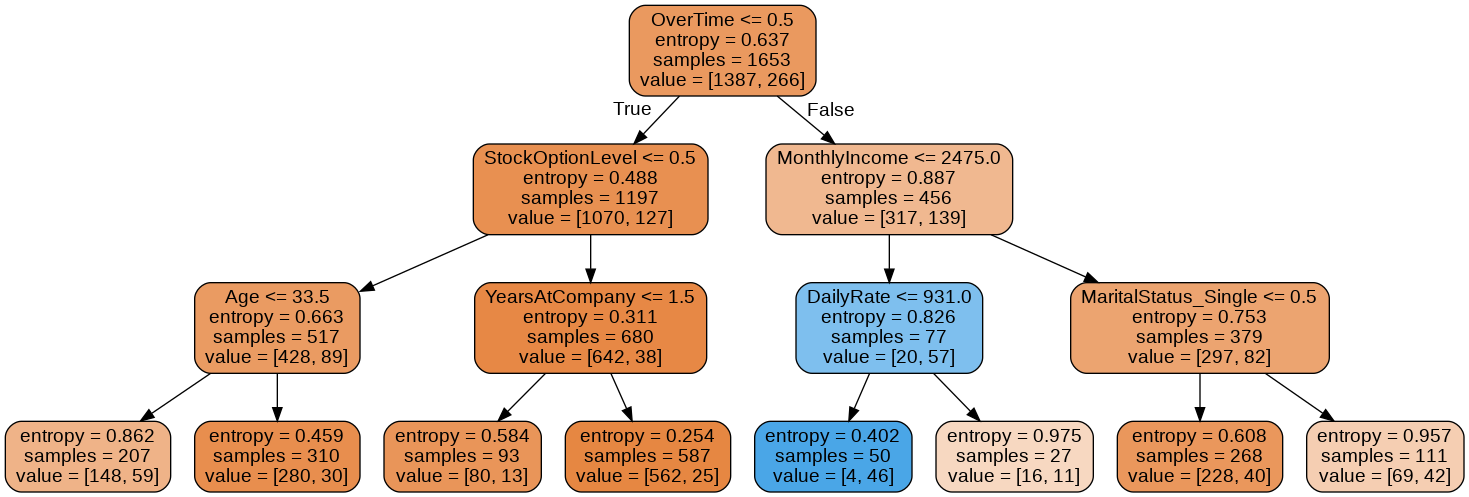

In [ ]:
dtc_new = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
dtc_new.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtc_new, out_file=dot_data, filled  = True, rounded = True, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

This is a much better visualisation. However, this is not the tree we have finalised for our model and is just for visualisation demonstration.

In [ ]:
## Calculating feature importance and printing top 10 important features

features = X_train.columns
feat_importance = dtc.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, dtc.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.columns  = ['Importances']
feat_imp = feat_imp.sort_values(by='Importances', ascending=False)
feat_imp.head(10)

,Importances
DailyRate,0.102871
MonthlyIncome,0.084919
PercentSalaryHike,0.080936
YearsAtCompany,0.076930
HourlyRate,0.068513
DistanceFromHome,0.065100
Age,0.063978
OverTime,0.060299
MonthlyRate,0.031601
JobSatisfaction,0.030963


**Observations**
 - Monthly income has turned out to the most important feature for predicting attrition followed by HourlyRate, MonthlyRate.
 - This implies that income related features for an employee are the most important features in predicting attrition.
 - Other factors that have turned out to be important are Age, TotalWorkingYears, YearsWithCurrentManager and Distance from home.
 - To think: What are the possible implications of these features?
  

## Random Forests

- Let us now try out forests to see if we can get a decision structure that generalises better on unseen data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)
print("*****************for 1000 estimators*****************")
print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_test, rfc.predict(X_test)))

*****************for 1000 estimators*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1387
           1       1.00      1.00      1.00       266

    accuracy                           1.00      1653
   macro avg       1.00      1.00      1.00      1653
weighted avg       1.00      1.00      1.00      1653

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       616
           1       0.97      0.56      0.71       119

    accuracy                           0.93       735
   macro avg       0.95      0.78      0.84       735
weighted avg       0.93      0.93      0.92       735



In [ ]:
# rfc.feature_importances_

feat_imp_dict = dict(zip(features, rfc.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.columns  = ['Importances']
feat_imp = feat_imp.sort_values(by='Importances', ascending=False)
feat_imp.head(10)

,Importances
MonthlyIncome,0.074418
Age,0.062899
DailyRate,0.054016
MonthlyRate,0.052066
TotalWorkingYears,0.048544
HourlyRate,0.047441
DistanceFromHome,0.046878
OverTime,0.046581
YearsAtCompany,0.042841
PercentSalaryHike,0.036821


**Insights**
- Random forest is not an improvement over the performance of the tree in this case if recall for class 1 is to be considered. 
- It, however, gives better recall scores for the class 0 and overall accuracy score.
- Similar features appear in the feature importance list generated through random forest.



## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dict_recall_boost = {}

for m in range(1,20 ,1):
  lista = []
  boost_tree =AdaBoostClassifier(n_estimators=400, learning_rate=m/10 ,random_state=42)
  boost_tree.fit(X_train, y_train)
  lista.append(recall_score(y_train, boost_tree.predict(X_train), pos_label = 1))
  lista.append(recall_score(y_val, boost_tree.predict(X_val), pos_label = 1))
  dict_recall_boost[m] = lista

df = pd.DataFrame(dict_recall_boost)
df.index = ['Train', 'Val']
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Train,0.368421,0.458647,0.541353,0.586466,0.62406,0.650376,0.665414,0.721805,0.721805,0.770677,0.778195,0.827068,0.827068,0.864662,0.898496,0.936090,0.939850,0.924812,0.906015
Val,0.280899,0.404494,0.426966,0.471910,0.47191,0.494382,0.471910,0.494382,0.505618,0.516854,0.550562,0.595506,0.573034,0.606742,0.606742,0.662921,0.640449,0.651685,0.617978


In [ ]:
abcl_1 = AdaBoostClassifier(n_estimators=400, learning_rate=1.6, random_state=42)
abcl_1.fit(X_train, y_train)

print("Train")
print(classification_report(y_train, abcl_1.predict(X_train)))
print("Test")
print(classification_report(y_test, abcl_1.predict(X_test)))

Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1387
           1       0.99      0.94      0.96       266

    accuracy                           0.99      1653
   macro avg       0.99      0.97      0.98      1653
weighted avg       0.99      0.99      0.99      1653

Test
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       616
           1       0.79      0.67      0.73       119

    accuracy                           0.92       735
   macro avg       0.87      0.82      0.84       735
weighted avg       0.91      0.92      0.92       735



**Observations**
-  Adaboost with a learning rate of 1.6 and n_estimators = 400 does seem to be similar to the fully grown tree in terms of performance.

- We can go ahead with the fully grown tree as our final model

### Final Insights

- We found that the tree is working better than the models seen previously (KNN and Logistic Regression) suggesting that the data is better decsribed by a tree based model. 

- The aim of the exercise was to improve the recall for the class 1 (employees who attrite). The fully grown tree did a decent job on the test data. However, the recall and precision for other class could also be important and in that case we will have to aim to improve the required metric.

- The model can be important to predict if an employee is going to leave the organisation. Necessary measures can be taken to stop the attrition.

- We could not use GridSearch and RandomSearch directly here.
